# Difference Methods

**Overview:**

In this notebook, we will start to consider difference methods - a way to numerically estimate derivatives. These methods provide us with recipes to construct numerical algorithms that can be used to solve differential equations.

**Import modules**

Begin by importing modules to conduct calculations and make plots in this notebook.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## A First Example: A Toss Up
As a first example, we will begin by considering the trajectory of a ball that is tossed in the air. When the ball is in the air, it is only subjected to gravity (neglecting frictional drag forces for simplicity). The equation describing the ball's trajectory is $y(t)$.

In this scenario, we know that the acceleration of the object is given by the gravitational constant $g$ here on Earth:

##### Differential Equation
The differential equation is

$$
y''(t) = -g
$$

where here we have included the $-$ to indicate that $y$ is measured in the positive direction upward from Earth.

If we'd like to predict the full trajectory of our ball in the air, we also need to have the initial conditions for our toss - where it starts and how fast we throw it.

##### Initial Conditions
The initial conditions are

$$
\begin{align}
y'(0) &= v_0\\
y(0) &= 0
\end{align}
$$

where $v_0$ is the initial velocity and $0$ represents the starting height of the ball (your hand). 

### An Analytical Solution

In this simple example, we are able to compute an "analytical solution" for the trajectory for this ball toss over time. That is, using rules of calculus, we can write down an equation that describes the trajectory:

$$
y = -\frac{g}{2}t^2 + v_0t
$$

#### &#x1F914; Sanity Check
Check that this analytical solution does indeed satisfy the differential equation and initial conditions above. 

Let's create a quick plot of this trajectory. Start by computing the trajectory based on the above solution:

In [3]:
# define constants
g = 9.8 #m/s2

# define initial conditions
v_0 = 25 #m/s
y_0 = 0 #m

# make a time array
dt = 0.1
t = np.arange(0,2*v_0/g,dt)

# compute the trajectory
y = -(g/2)*t**2 + v_0*t

Then, plot the solution:

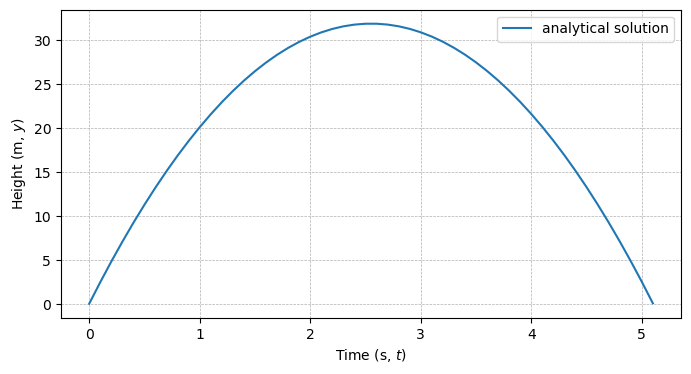

In [4]:
# make a plot of the solution
fig = plt.figure(figsize=(8,4))

# enter plotting line here
plt.plot(t, y, label='analytical solution')

# format axes
plt.legend()
plt.ylabel('Height (m, $y$)')
plt.xlabel('Time (s, $t$)')
plt.grid(linestyle='--',linewidth=0.5)
plt.show()

As we can see, the ball rises up through the air from its initial height and then starts to descend. This follows our intuitition of the scenario.

### A Numerical Solution
In this simple example, we can write an analytical solution describing the whole trajectory through time. However, what if we didn't know how to do that? In other words, what if we couldn't write down a specific equation? One alternative is to track the ball in the air through time, using knowledge of the ball's position and speed along with the physics of the situation to determine the trajectory.

From calculus, we know that the derivative of an equation represents a change in the value over a given interval (time in this case). We could approximate this as follows:

$$
\frac{dy}{dt} \approx \frac{y(t+\Delta t) - y(t)}{\Delta t}
$$

A little rearranging gives us the following:

$$
y(t+\Delta t) \approx y(t) + \frac{dy}{dt} \Delta t
$$

In other words: the position at a short time in the future ($y(t+\Delta t)$) is the position at the current time ($y(t)$) plus the rate of change of the object times the time interval. This approach is at the heart of **Euler's Method** for solving differential equations.

In a similar sense, we could apply the same idea to estimate the second derivative:

$$
y'(t+\Delta t) \approx y'(t) + \frac{d^2y}{dt^2} \Delta t
$$

Let's see if we can use this information to chart out a trajectory.

#### Solution at time $t = \Delta t$

At time $t=\Delta t$, the above equations give us

$$
y(\Delta t) \approx y(0) + \frac{dy}{dt} \Delta t = v_0 \Delta t
$$

and 

$$
y'(\Delta t) \approx y'(0) + \frac{d^2y}{dt^2} \Delta t = v_0 -g \Delta t
$$

Let's plot this information as before:

In [5]:
# define the time step
delta_t = 0.1 # seconds

# estimate the next position
y_1 = v_0*delta_t

# estimate the next velocity
v_1 = v_0 - g * delta_t

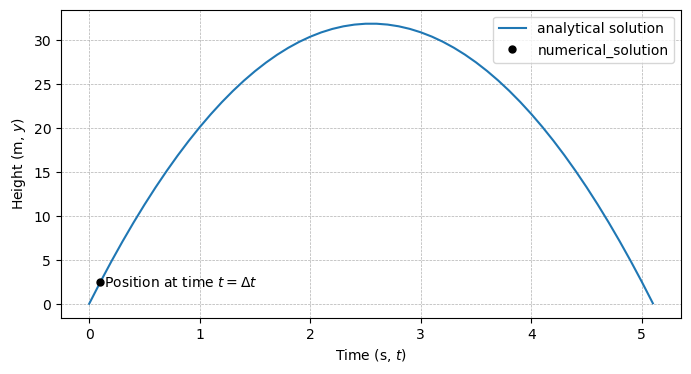

In [6]:
fig = plt.figure(figsize=(8,4))
plt.plot(t, y, label='analytical solution')

plt.plot(delta_t, y_1, 'k.', markersize=10, label='numerical_solution')
plt.text(delta_t, y_1, ' Position at time $t=\Delta t$', va='center')

plt.legend()
plt.ylabel('Height (m, $y$)')
plt.xlabel('Time (s, $t$)')
plt.grid(linestyle='--',linewidth=0.5)
plt.show()

#### Solution at time $t = 2\Delta t$

At time $t=2\Delta t$, we can take one additional step from the location we just solved for:

$$
y(2\Delta t) \approx y(\Delta t) + \frac{dy}{dt} \Delta t = y_1 + v_1 \Delta t
$$

and 

$$
y'(2\Delta t) \approx y'(\Delta t) + \frac{d^2y}{dt^2} \Delta t = v_1 -g \Delta t
$$

Let's plot this information as before:

In [7]:
# estimate the next position
y_2 = y_1 + v_1*delta_t

# estimate the next velocity
v_2 = v_1 - g * delta_t

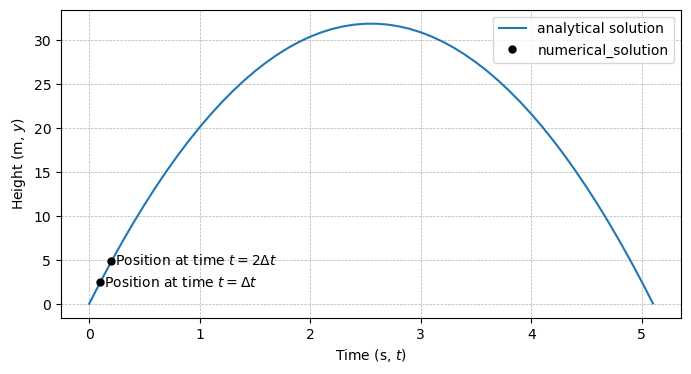

In [8]:
fig = plt.figure(figsize=(8,4))
plt.plot(t, y, label='analytical solution')

plt.plot(delta_t, y_1, 'k.', markersize=10, label='numerical_solution')
plt.text(delta_t, y_1, ' Position at time $t=\Delta t$', va='center')

plt.plot(2*delta_t, y_2, 'k.', markersize=10)
plt.text(2*delta_t, y_2, ' Position at time $t=2\Delta t$', va='center')

plt.legend()
plt.ylabel('Height (m, $y$)')
plt.xlabel('Time (s, $t$)')
plt.grid(linestyle='--',linewidth=0.5)
plt.show()

#### Solution at all times
Leveraging the approach above, we can generalize the algorithm with a loop:

In [9]:
# make a time array for the iteration
delta_t = 0.1
n_timesteps = int((2*v_0/g)/delta_t)

# make empty arrays to store the solution
y_solution = np.zeros((n_timesteps,))
v_solution = np.zeros((n_timesteps,))

# start the solutions with the initial conditions
y_solution[0] = y_0
v_solution[0] = v_0

# loop through the entire time array
for i in range(n_timesteps-1):
    
    # estimate the next velocity
    v_next = v_solution[i] - g * delta_t
    v_solution[i+1] = v_next

    # estimate the next position
    y_next = y_solution[i] + v_solution[i]*delta_t
    y_solution[i+1] = y_next

Now, plot the full solution:

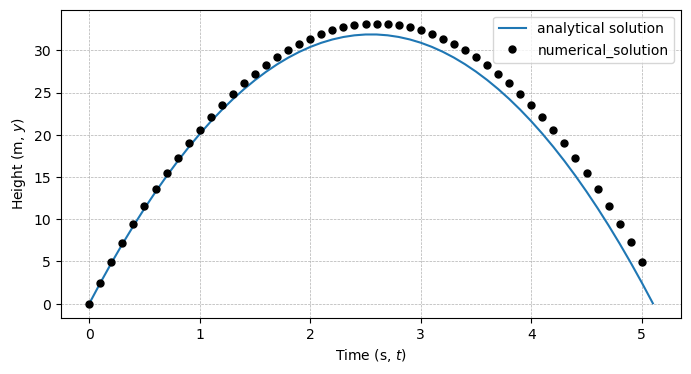

In [10]:
fig = plt.figure(figsize=(8,4))
plt.plot(t, y, label='analytical solution')

t_solution = np.arange(0,2*v_0/g-0.01,delta_t)
plt.plot(t_solution, y_solution, 'k.',
         markersize=10, label='numerical_solution')

plt.legend()
plt.ylabel('Height (m, $y$)')
plt.xlabel('Time (s, $t$)')
plt.grid(linestyle='--',linewidth=0.5)
plt.show()

#### &#x1F914; Question for consideration:
Shoot! It looks like we've over shot the solution. Why?


Let's try again with a different approximation to the derivative. What if we try to anticipate what the derivative will be on the upcoming timestep to "get ahead" of the accumulated errors? Let's see:

In [11]:
# make a time array for the iteration
delta_t = 0.1
n_timesteps = int((2*v_0/g)/delta_t)

# make empty arrays to store the solution
y_solution = np.zeros((n_timesteps,))
v_solution = np.zeros((n_timesteps,))

# start the solutions with the initial conditions
y_solution[0] = y_0
v_solution[0] = v_0

# loop through the entire time array
for i in range(n_timesteps-1):
    
    # estimate the next velocity
    v_next = v_solution[i] - g * delta_t
    v_solution[i+1] = v_next

    # estimate the next position
    y_next = y_solution[i] + v_solution[i+1]*delta_t
    y_solution[i+1] = y_next

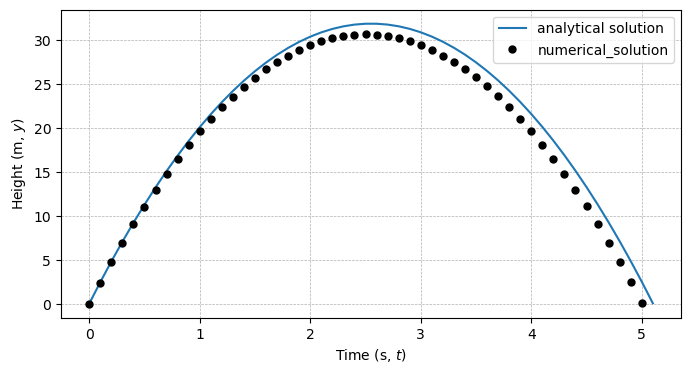

In [12]:
fig = plt.figure(figsize=(8,4))
plt.plot(t, y, label='analytical solution')

t_solution = np.arange(0,2*v_0/g-0.01,delta_t)
plt.plot(t_solution, y_solution, 'k.',
         markersize=10, label='numerical_solution')

plt.legend()
plt.ylabel('Height (m, $y$)')
plt.xlabel('Time (s, $t$)')
plt.grid(linestyle='--',linewidth=0.5)
plt.show()

#### &#x1F914; Question for consideration:
Shoot! It looks like we've now undershot the solution. Why?

Any other ideas? Maybe split the difference?

In [13]:
# make a time array for the iteration
delta_t = 0.1
n_timesteps = int((2*v_0/g)/delta_t)

# make empty arrays to store the solution
y_solution = np.zeros((n_timesteps,))
v_solution = np.zeros((n_timesteps,))

# start the solutions with the initial conditions
y_solution[0] = y_0
v_solution[0] = v_0

# loop through the entire time array
for i in range(n_timesteps-1):
    
    # estimate the next velocity
    v_next = v_solution[i] - g * delta_t
    v_solution[i+1] = v_next

    # estimate the next position
    y_next = y_solution[i] + (v_solution[i+1]+v_solution[i])/2*delta_t
    y_solution[i+1] = y_next

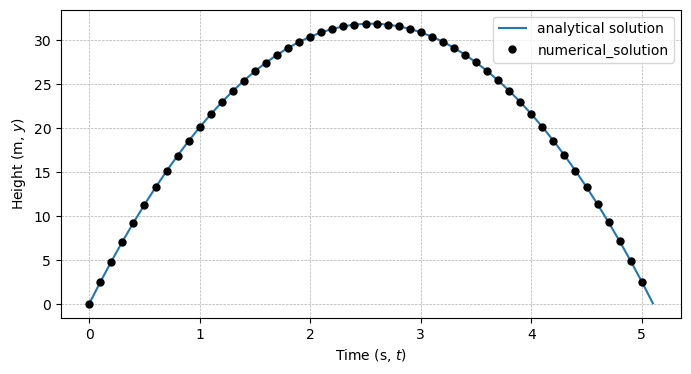

In [14]:
fig = plt.figure(figsize=(8,4))

plt.plot(t, y, label='analytical solution')

t_solution = np.arange(0,2*v_0/g-0.01,delta_t)
plt.plot(t_solution, y_solution, 'k.',
         markersize=10, label='numerical_solution')

plt.legend()
plt.ylabel('Height (m, $y$)')
plt.xlabel('Time (s, $t$)')
plt.grid(linestyle='--',linewidth=0.5)
plt.show()

Ah! This time we nailed it.

The key take-away in the above equations is that esimating the rate of change of the solution through time is key for getting a good approximation to the true solution through time.

## Difference Methods for Derivatives
In the examples above, we saw a few different ways we could approximate the derivative. Let's review these approximations here:

#### Forward Difference
A forward difference uses estimates of the solution at a time now and one time step in the future to estimate the derivative:

$$
y'(t) \approx \frac{y(t+\Delta t) - y(t)}{\Delta t}
$$

#### Backward Difference
A backward difference uses estimates of the solution at a time now and one time step in the *past* to estimate the derivative:

$$
y'(t) \approx \frac{y(t) - y(t-\Delta t)}{\Delta t}
$$

#### Centered Difference
A centered difference uses estimates of the solution one time step in the future and one time step in the past to estimate the derivative:

$$
y'(t) \approx \frac{y(t+\Delta t) - y(t-\Delta t)}{2\Delta t}
$$

##### &#x1F914; Sanity Check
In the solution above, we averaged the forward and backwards velocities to obtain a better solution - this is equivalent to the centered difference. Show that the centered difference is equivalent to averaging the forward and backward differences.

## Difference Methods for Second Derivatives
In the examples above, we explicitly solved for velocity through time by considering the gravitational acceleration. However, we could also approximate the second derivative in the same way. Consider the forward difference as applied to the second derivative:

$$
y''(t) \approx \frac{y'(t+\Delta t) - y'(t)}{\Delta t}
$$

What happens if we appoximate $y'(t+\Delta t)$ and $y'(t)$ each by backwards differences? Fill this in to derive an approximation to the second derivative.

$$
y''(t) \approx \frac{y(t+\Delta t) - 2y(t) + y(t-\Delta t)}{\Delta t^2}
$$